In [26]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [6]:
# Load the dataset
file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file_path)

# Display first few rows to understand structure
print(df.head())


  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   int64 
 3   Job_Role                           5000 non-null   int64 
 4   Industry                           5000 non-null   int64 
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   int64 
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   int64 
 11  Mental_Health_Condition            5000 non-null   int64 
 12  Access

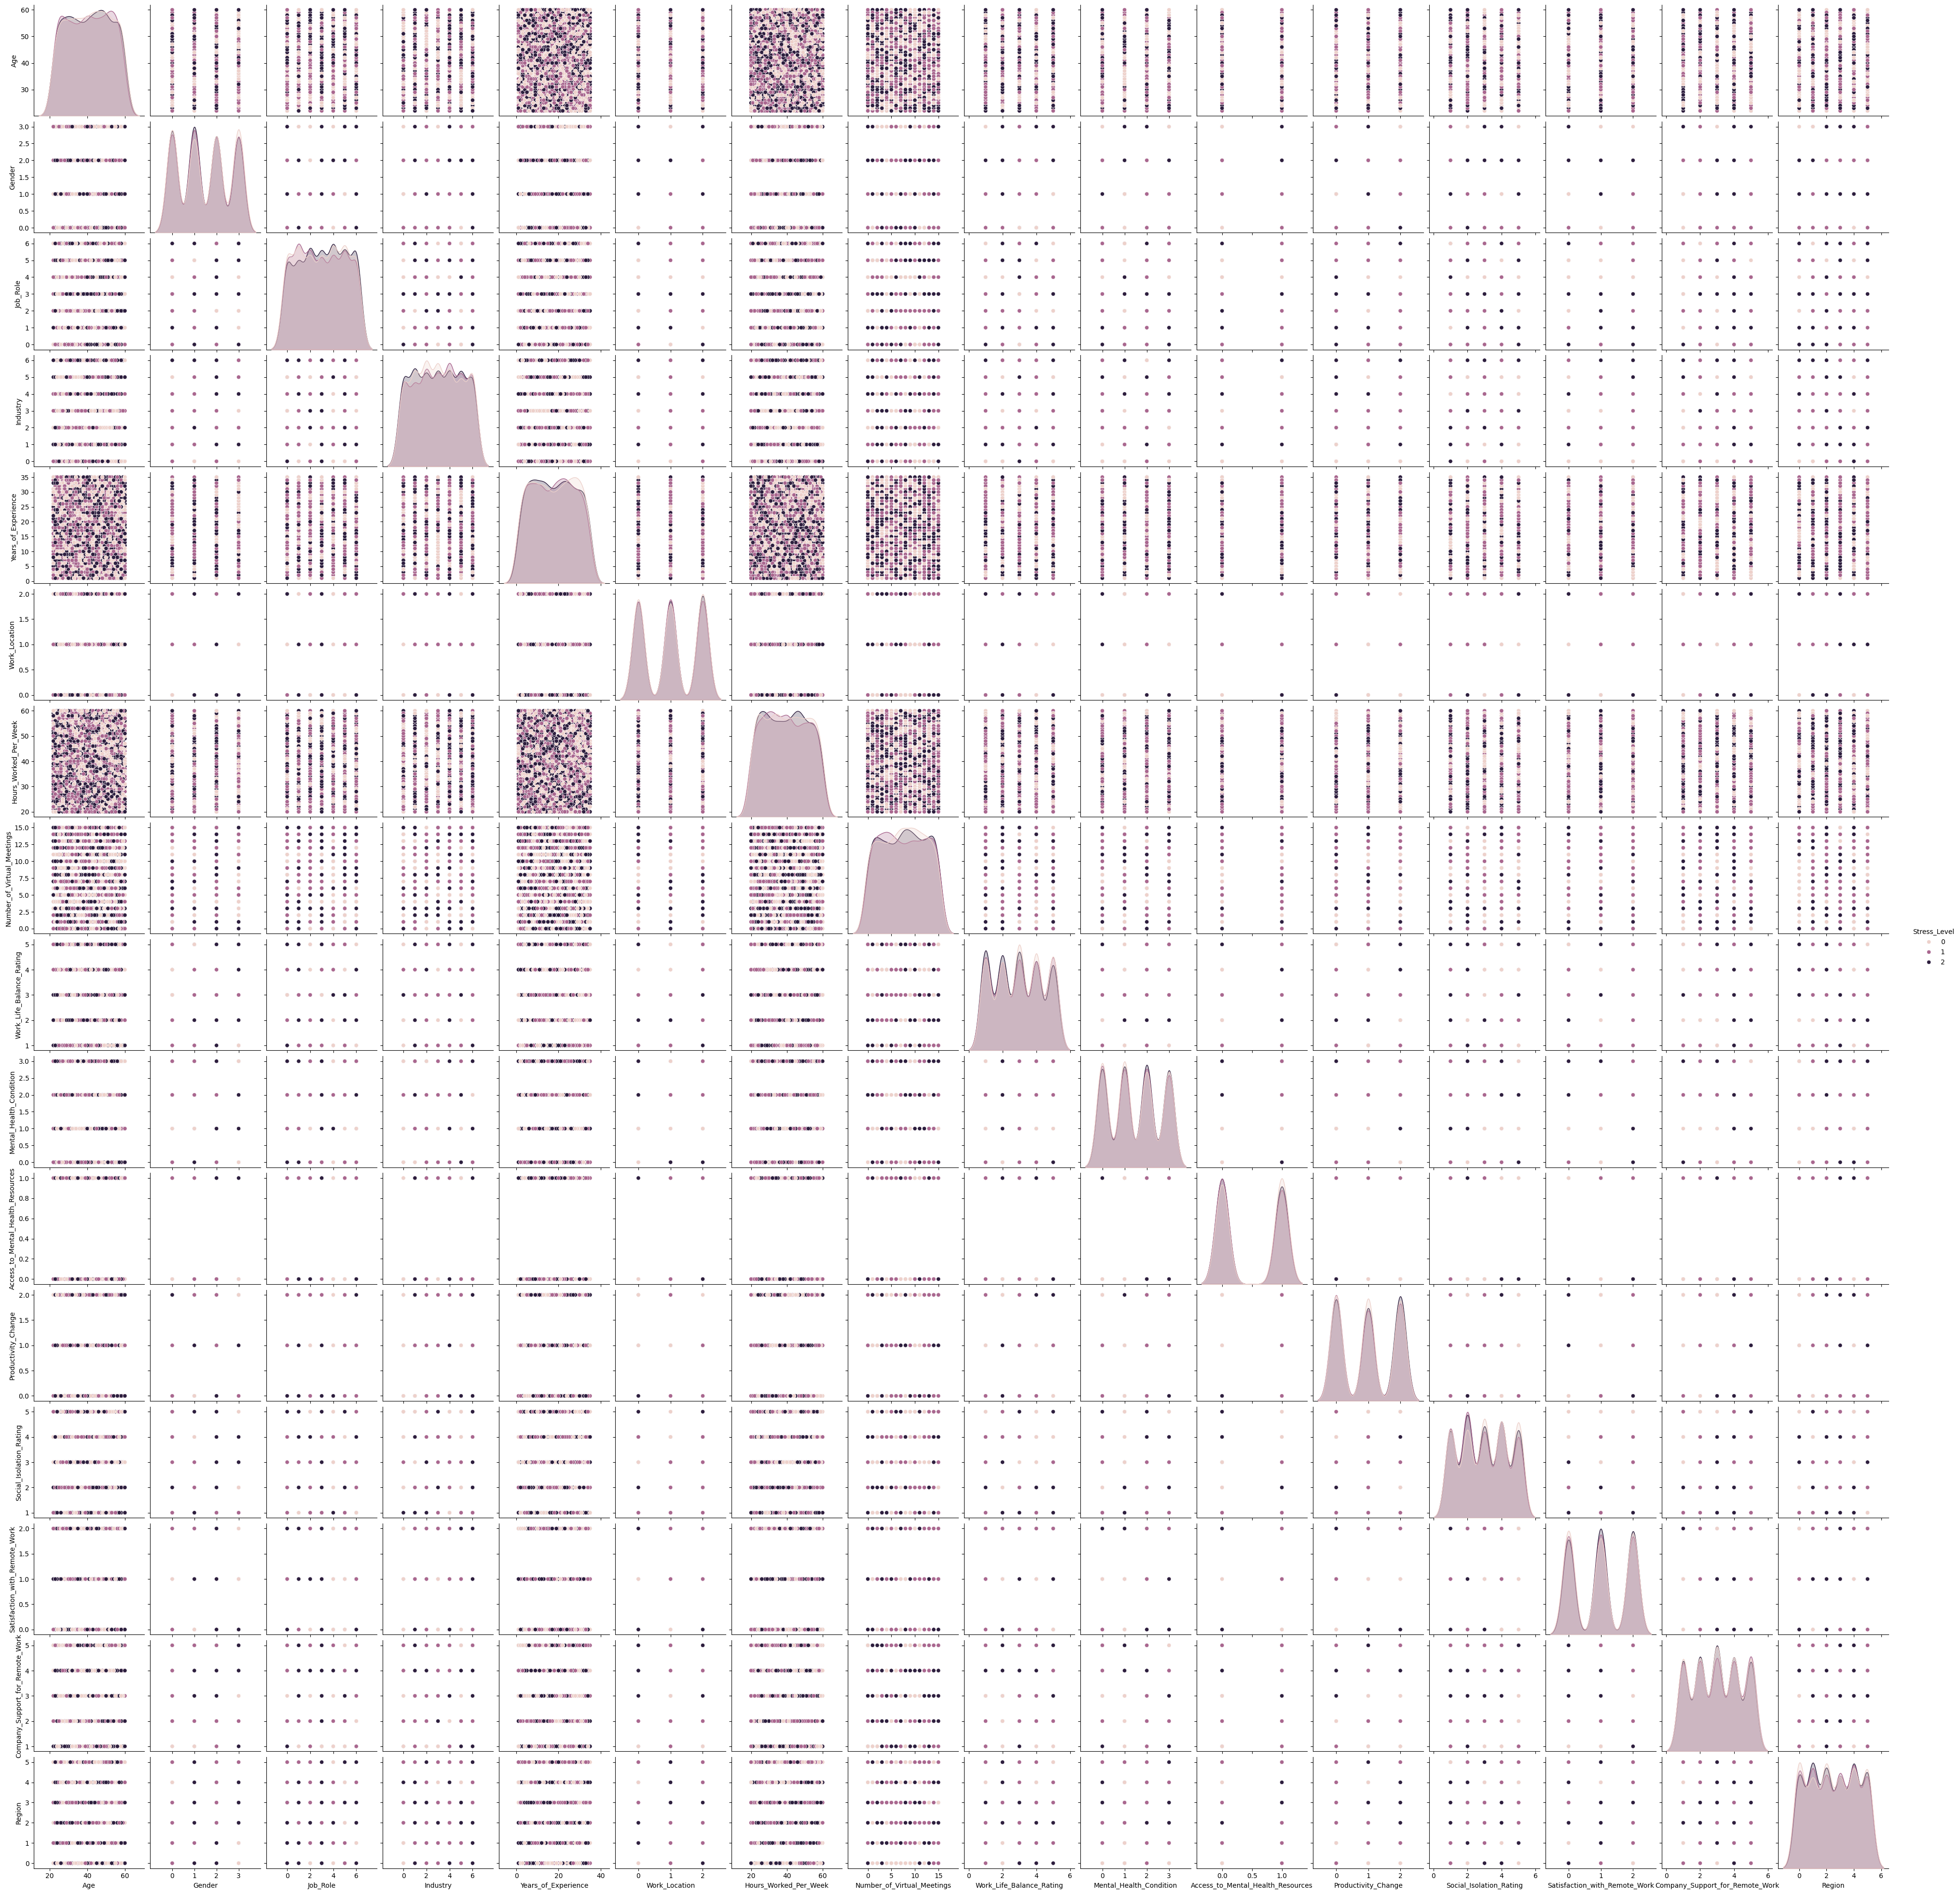

In [25]:
# Exploratory Data Analysis (EDA)

# Check for missing values and column types
print(df.info())
print(df.isnull().sum())

# Pairplot to visualize relationships, with "Stress_Level" as the target variable
sns.pairplot(data=df, hue='Stress_Level', diag_kind='kde')
plt.show()


In [22]:
# Preprocessing the Data

# Encode categorical variables to numeric
categorical_cols = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Mental_Health_Condition', 
                    'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 
                    'Region', 'Stress_Level']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Selecting features and target variable
X = df[['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Number_of_Virtual_Meetings', 
        'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']]
y = df['Stress_Level']


In [20]:
# Train-Test Split

# Stratify ensures the distribution of 'Stress_Level' remains consistent in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=y)


In [21]:
# Train the KNN Model

# Initialize KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [24]:
# Make Predictions and Evaluate the Model

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



Confusion Matrix:
 [[254 190 230]
 [252 225 181]
 [215 240 213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.36       674
           1       0.34      0.34      0.34       658
           2       0.34      0.32      0.33       668

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000



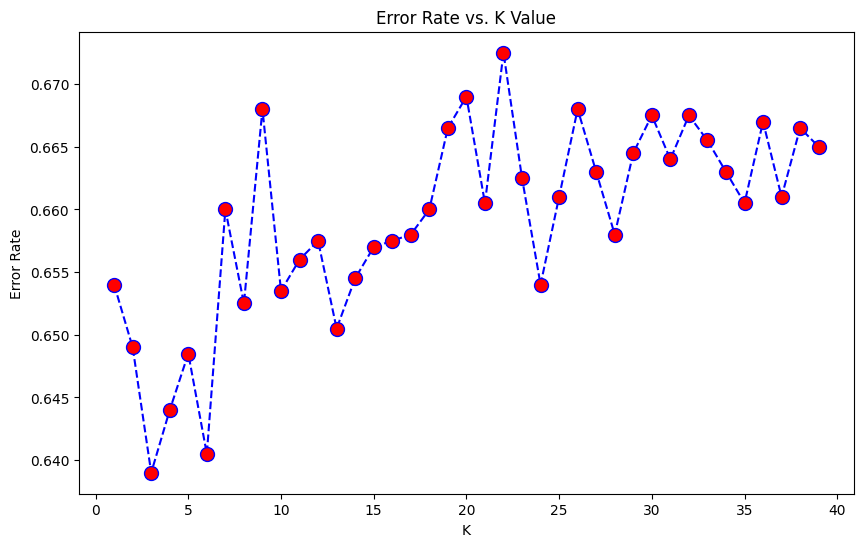

In [27]:
# Find the Best K Value Using Cross-Validation

# Calculate the error rate for different K values
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate vs. K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()



In [28]:
# Retrain the Model with Optimal K

# Optimal K is the one with the minimum error rate
optimal_k = error_rate.index(min(error_rate)) + 1

# Train the model using the optimal K value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict and evaluate with the optimal K
y_pred_optimal = knn.predict(X_test)

# Generate the classification report for the optimal K
optimal_class_report = classification_report(y_test, y_pred_optimal)
print(f"Classification Report for K={optimal_k}:\n", optimal_class_report)

# Calculate model accuracy
optimal_accuracy = knn.score(X_test, y_test)
print(f"Accuracy with K={optimal_k}: {optimal_accuracy}")




Classification Report for K=3:
               precision    recall  f1-score   support

           0       0.35      0.52      0.42       674
           1       0.38      0.30      0.34       658
           2       0.35      0.26      0.30       668

    accuracy                           0.36      2000
   macro avg       0.36      0.36      0.35      2000
weighted avg       0.36      0.36      0.35      2000

Accuracy with K=3: 0.361
